# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** Imad Eddine **MAROUF**

**Author:** Mert **ERTUGRUL**

**Author:** Arnaud **DUVIEUSART**

**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [22]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [23]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

#print(a.shape, b.shape, c.shape)

### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

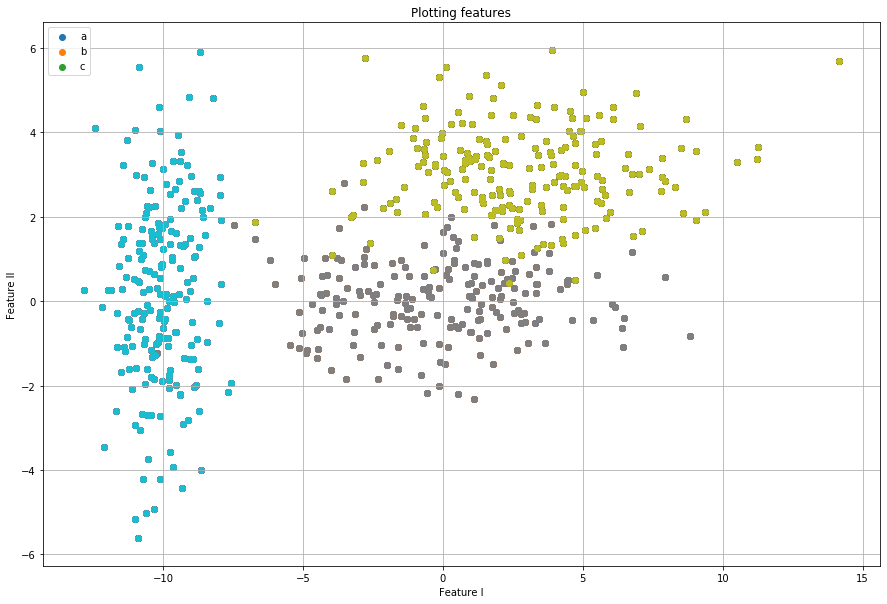

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for elem in range(len(a)):
    ax.scatter(a[:, 0], a[:, 1])
    ax.scatter(b[:, 0], b[:, 1])
    ax.scatter(c[:, 0], c[:, 1])

ax.set_xlabel("Feature I")
ax.set_ylabel("Feature II")
ax.set_title("Plotting features")
ax.legend(['a', 'b', 'c'], loc='upper left')
ax.grid()

**Comment:**

- In order to set-up appropriate hypothesis about our data if it is Gaussian, we have to plot the features distribution and see its variances.

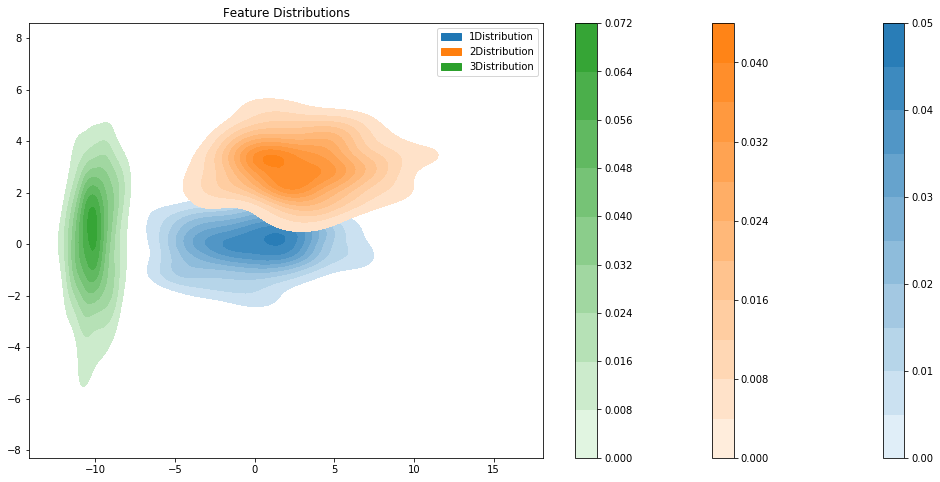

In [25]:
f, ax = plt.subplots(figsize=(18, 8))
plt.title('Feature Distributions')

for axes, data in enumerate([a,b,c]):
    sns.kdeplot(data = data[:,0], data2 = data[:,1], ax = ax, cbar=True,
                cbar_kws={'boundaries': np.linspace(0,0.075,5)},
               shade = True, shade_lowest = False, label=str(axes+1) + 'Distribution')
    plt.legend()

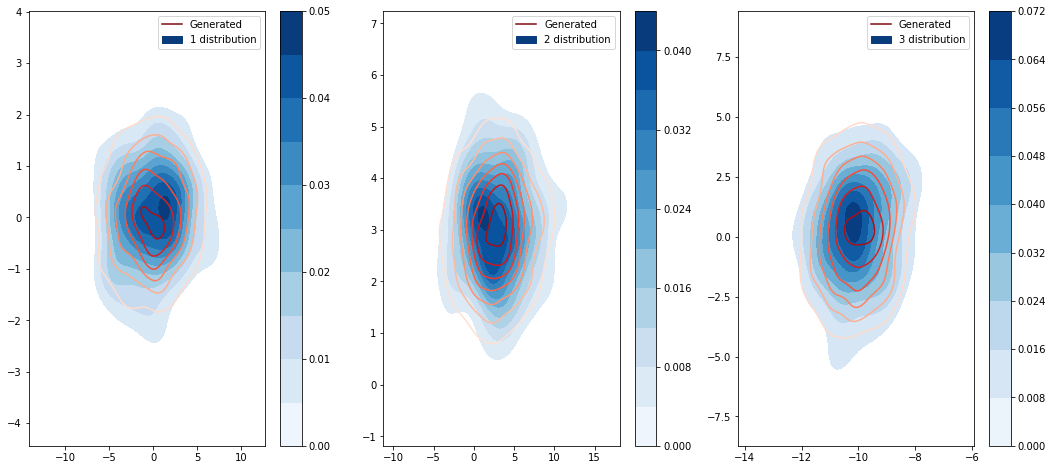

In [26]:
import pandas as pd

distribition = pd.DataFrame(index=['a','b','c'], columns=['Mean', 'Covariance'])

plt.figure(figsize=(18,8))

for idx, data in enumerate([a,b,c]):
    # Estimations
    mean_tmp = np.mean(data, axis = 0)
    cov_tmp = np.cov(data, rowvar = False)
    
    # Data storing
    distribition.iloc[idx, 0] = mean_tmp
    distribition.iloc[idx, 1] = cov_tmp
    
    # Generation based on Estimation
    generated = np.random.multivariate_normal(mean_tmp, cov_tmp, 10*len(data))
    
    # Plotting
    ax = plt.subplot(1, 3, idx+1)
    sns.kdeplot(data = generated[:, 0], data2 = generated[:, 1], ax = ax,
                cbar = False, cbar_kws = {'boundaries': np.linspace(0, 0.075, 5)},
                n_levels = 7, cmap = "Reds", label = 'Generated')
               
    
    sns.kdeplot(data = data[:, 0], data2 = data[:, 1], ax = ax, cbar = True,
                cbar_kws = {'boundaries': np.linspace(0, 0.075, 5)},
                shade = True, shade_lowest = False, cmap = 'Blues',
                label = str(idx+1)+' distribution')
    
    plt.legend()

**Comment:**

- As illustrated in the 1st figure, we see that approximately the 1st class (a), 2nd class (b) have the same variance.
- The highest point density of raw and estimated distribution are overlapping. Moreover, their overall shape is similar which means that the distribution is properly estimated.

In [27]:
distribition['Mean']= distribition.Mean.apply(lambda x: np.round(x))
distribition['Covariance']= distribition.Covariance.apply(lambda x: (np.round(x)).diagonal())

In [28]:
distribition

,Mean,Covariance
a,"[-0.0, 0.0]","[10.0, 1.0]"
b,"[3.0, 3.0]","[10.0, 1.0]"
c,"[-10.0, 0.0]","[1.0, 5.0]"


**Comment:**

- A, B distributions have the same covariance matrix but no disitribution is isotropic.

--------------------------------------------------------------------------------------------------------------

**Hypotheses:**  

1. The distribution of the features of these classes are i.i.d. Gaussian.
2. Priors are the same since we have the same number of data for each class.

For each class (a, b, c), we have $n$ data points, then
$$X = 
\left[
\begin{matrix}
 x_{11}      & x_{12}      \\
 x_{21}      & x_{22}      \\
 \vdots & \vdots     \\
 x_{n1}      & x_{n2}      \\
\end{matrix}
\right]$$

Using MLE, the mean value $\mu$ is

$$\hat\mu = \left[
\begin{matrix}
 \cfrac{1}{n}\sum_{j=1}^{n}{x_{j1}}      & \cfrac{1}{n}\sum_{j=1}^{n}{x_{j2}}  
\end{matrix}
\right]$$


and the covariance matrix $\Sigma$ is

$$\hat\Sigma ＝ \cfrac{1}{n}(X-\hat\mu)^T(X-\hat\mu) \quad \text{with } \hat\Sigma_{12}=\hat\Sigma_{21}=0 $$

Reference: https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f

Now, after calculating the covariance and mean we can plot the decision curves for future predictions

The decision boundaries are computed using:

$$\text{$f_{ba}$:}\quad \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_2-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_2-\mu_{b2})^2}{\sigma_{b2}^2} $$
$$\text{$f_{ac}$:}\quad \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_2-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{c1})^2}{\sigma_{c1}^2} + \cfrac{(x_2-\mu_{c2})^2}{\sigma_{c2}^2} $$
$$\text{$f_{bc}$:}\quad \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_2-\mu_{b2})^2}{\sigma_{b2}^2} =  \cfrac{(x_1-\mu_{c1})^2}{\sigma_{c1}^2} + \cfrac{(x_2-\mu_{c2})^2}{\sigma_{c2}^2} $$

From previous calculations:

$$\hat\mu_a = [0, 0],\quad \hat\mu_b = [3, 3],\quad \hat\mu_c = [-10, 0]$$
$$\hat\sigma_a^2=[10, 1],\quad \hat\sigma_b^2=[10, 1],\quad \hat\sigma_c^2=[1, 5]$$

Therefore, the decision functions are:

$$\text{ $f_{ba}$:}\quad 2x_1+20x_2-33=0$$

$$\text{ $f_{ac}$:}\quad 0.9x_1^2+20x_1-0.8x_2^2+100=0$$

$$\text{ $f_{bc}$:}\quad 0.9x_1^2+20.6x_1-0.8x_2^2+6x_2+90.1=0$$

In [29]:
acx1 = np.arange(-15.0, 15, 0.1)
acx2 = np.arange(-6.0, 2.3, 0.1)
acX1, acX2 = np.meshgrid(acx1, acx2)
f_ac = 0.9 * acX1**2 + 20*acX1 - 0.8*acX2**2 + 100

bax1 = np.arange(-7, 15, 0.1)
bax2 = np.arange(-6, 6, 0.1)
baX1, baX2 = np.meshgrid(bax1, bax2)
f_ba = 2 * baX1 + 20*baX2 - 33

bcx1 = np.arange(-15.0, 15, 0.1)
bcx2 = np.arange(2.3, 6, 0.1)
bcX1, bcX2 = np.meshgrid(bcx1, bcx2)
f_bc = 0.9 * bcX1**2 + 20.6*bcX1 - 0.8 * bcX2**2 + 6*bcX2 +90.1

/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'label'
  
/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  if __name__ == '__main__':
/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'label'
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


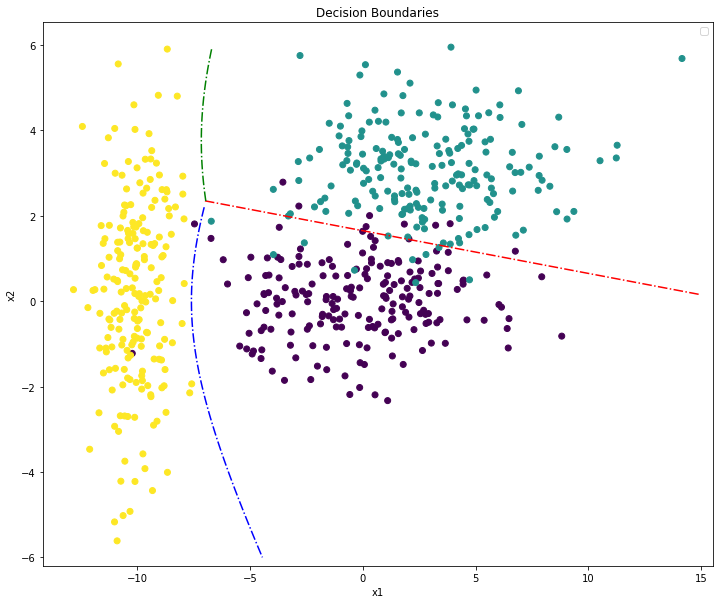

In [30]:
X = np.concatenate((a, b, c), axis=0)
y = np.concatenate((np.ones(200), 2*np.ones(200), 3*np.ones(200)), axis=0)

# drawing decision boundaries
plt.figure(figsize=(12,10))
plt.scatter(X[:,0], X[:,1], c=y)
lim = plt.axis()
plt.contour(baX1, baX2, f_ba, 0, linestyles='dashdot', colors='red', label = 'f_ab')
plt.contour(acX1, acX2, f_ac, 0, linestyles='dashdot', colors='blue', label = 'f_ac')
plt.contour(bcX1, bcX2, f_bc, 0, linestyles='dashdot', colors='green', label = 'f_bc')
plt.axis(lim)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision Boundaries")
plt.legend()
plt.show()


Now the performance of the Bayesian classifier can be measured on the data sets.

In [31]:
def bayesian_classifer(x1,x2):
    f_ba = ( 2 * x1 + 20*x2 - 33 ) > 0
    f_ac = ( 0.9 * x1**2 + 20*x1 - 0.8*x2**2 + 100 ) > 0
    f_bc = ( 0.9 * x1**2 + 20.6*x1 - 0.8 * x2**2 + 6*x2 +90.1 ) > 0
    
    if not f_ba and f_ac: return 0 #class a
    elif f_ba and f_bc: return 1 ##class b
    elif not f_ac and not f_bc : return 2 ##class c

Calculating error rate on the available data sets

In [32]:
errors = 0
for point in a:
    if bayesian_classifer(point[0],point[1]) : errors += 1
for point in b:
    if bayesian_classifer(point[0],point[1]) != 1: errors += 1
for point in c:
    if bayesian_classifer(point[0],point[1]) != 2: errors += 1
        
print('\t Bayesian classifier error: {:.02f}%'.format(errors / (a.shape[0]+b.shape[0]+c.shape[0]) * 100) )

	 Bayesian classifier error: 3.50%


----------------------------------------------------------------------------------------------

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

Mahalanobis distance can be defined as a dissimilarity measure between two random vectors $x$ and $y$ of the same distribution with the covariance matrix $S$: <br>

\begin{equation*}
d(\vec{x}, \vec{y}) = \sqrt{(\vec{x} - \vec{y})^T\ S^{-1} \ (\vec{x} - \vec{y})}
\end{equation*}

**Minimal Distance Classifier** based on Mahalanobis distance: 
$$
Class=\left\{
\begin{array}{rcl}
a & & {d_a < d_b}\\
b & & {d_b < d_a}
\end{array} \right.
$$

Mahalanobis distance is defined as:
$
d_m = \left((x-\mu_i)\Sigma_i^{-1}(x-\mu_i)^T\right)^{1/2}
$


The decision curve is where the distances to each class are the same, i.e. $d_a=d_b$.

$$d_a = \left((x-\mu_a)\Sigma_a^{-1}(x-\mu_a)^T\right)^{1/2},  d_b = \left((x-\mu_b)\Sigma_b^{-1}(x-\mu_b)^T\right)^{1/2}$$

$$d_a=d_b \Rightarrow \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_2-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_2-\mu_{b2})^2}{\sigma_{b2}^2}$$

**Comment:**

- The resulting decision boundary is the same as the previously found boundary between a and b used for Bayesian classification. 
   * Because the only difference between the decision fucntions for the two is the square root factor in Mahalanobis distance and since square root is a monotonically increasing function, it does not affect the classification. This will become apparent in the final comparison of the two methods.

From previous calculations:

$$\hat\mu_a = [0, 0],\quad \hat\mu_b = [3, 3]$$
$$\hat\sigma_a^2= [10, 1],\quad \hat\sigma_b^2=[10, 1]$$

$$d_a = \sqrt{\cfrac{x_1^2}{10} + x_2^2 }$$    $$d_b = \sqrt{\cfrac{(x_1-3)^2}{10} + (x_2-3)^2 }$$


Reference : 
- https://en.wikipedia.org/wiki/Mahalanobis_distance
- https://www.machinelearningplus.com/statistics/mahalanobis-distance/

**Comment:**

- Mahalonobis distance is the distance between a point and a distribution. And not between two distinct points. It is effectively a multivariate equivalent of the Euclidean distance.

In [33]:
def mahalanobis_classifier(X1 , X2):
    da = ( 0.1 * X1**2 + X2**2  )**0.5
    db = ( 0.1 * (X1-3)**2 + (X2-3)**2  )**0.5
    da_db = da - db   
    labels = da_db > 0 
    return da_db, labels

Now we find hte error rate of Mahalanobis and Bayesian classifiers and compare them.

In [35]:
test_data = np.vstack((a,b))
true_labels = np.concatenate([ np.zeros((a.shape[0])),  np.ones((b.shape[0])) ])
da_db, m_labels = mahalanobis_classifier(test_data[:,0],test_data[:,1])

m_misclassified = test_data[ true_labels != m_labels , :]
m_errors = m_misclassified.shape[0]

print('\t Mahalanobis distance error {:.02f}%'.format(m_errors / test_data.shape[0] * 100) )

#comparing to bayesian classifier

b_errors = 0
#using the equation for f_ba from part 1.1 
# f_ba is the bayesian classifier decision boundary between a and b
b_labels = ( 2 * test_data[:,0] + 20*test_data[:,1] - 33 ) > 0

b_misclassified = test_data[ true_labels != b_labels , :]
b_errors = b_misclassified.shape[0]

print('\t Bayesian classifier error {:.02f}%'.format(b_errors /test_data.shape[0] * 100) )    


x1 = np.arange(-7, 15, 0.1)
x2 = np.arange(-6, 6, 0.1)
X1, X2 = np.meshgrid(bax1, bax2)
da_db_mesh, _ = mahalanobis_classifier(X1 , X2)



	 Mahalanobis distance error 4.75%
	 Bayesian classifier error 4.75%


**Comment:**

- Both classifiers produce the same error rate for classes a and b. As the covariance matrices of the two classes are the same, the bayesian classifier practically has the same decision boundary as Mahalanobis classifier. 

Plotting the results for the two classifiers:

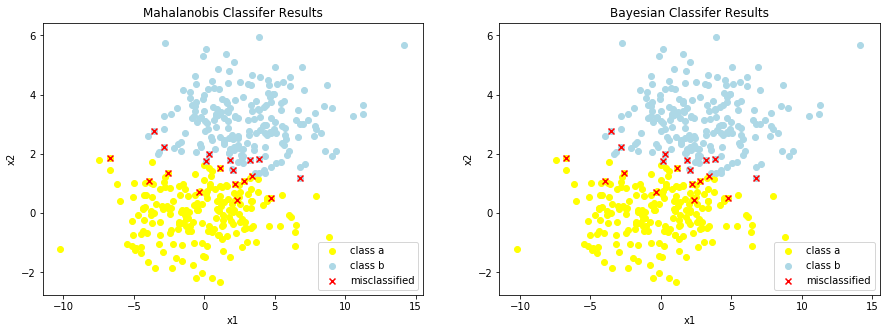

In [36]:
#Plotting Mahalanobis
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a_index = np.where(m_labels == 0)
b_index = np.where(m_labels == 1)

ax[0].scatter(test_data[a_index,0],test_data[a_index,1],c= 'yellow',label= "class a") 
ax[0].scatter(test_data[b_index,0],test_data[b_index,1],c= 'lightblue',label= "class b") 
ax[0].scatter(m_misclassified[:,0], m_misclassified[:,1], c='r' ,  marker='x', label="misclassified")
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].legend(loc='lower right')
ax[0].set_title("Mahalanobis Classifer Results")

#Plotting Bayesian
a_index = np.where(b_labels == 0)
b_index = np.where(b_labels == 1)

ax[1].scatter(test_data[a_index,0],test_data[a_index,1],c= 'yellow',label= "class a") 
ax[1].scatter(test_data[b_index,0],test_data[b_index,1],c= 'lightblue',label= "class b") 
ax[1].scatter(m_misclassified[:,0], m_misclassified[:,1], c='r' ,  marker='x', label="misclassified")
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].legend(loc='lower right')
ax[1].set_title("Bayesian Classifer Results")
plt.show()


----------------------------------------------------------------------------------------------

## Additional Methods

**1\ K-Nearest Neighbours**

KNN (K-Nearest Neighbor) is a simple supervised classification algorithm to assign a class to a new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.

Reference: https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

In [133]:
#Need to create a dataset for training
#Labels (0, 1, 2)
y = np.zeros((len(a)*3, 1))
y[len(a):len(a)*2] = 1
y[len(a)*2:len(a)*3] = 2

#Training
X = np.vstack((a, b))
X = np.vstack((X, c))

In [134]:
print("\t X shape: {}, Y shape: {}".format(X.shape, y.shape))

X shape: (600, 2), Y shape: (600, 1)


In [135]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4) 

In [136]:
print("X_train shape: {}, Y_train shape: {}, X_test shape: {}, Y_test shape: {}".format(X_train.shape, Y_train.shape, x_test.shape, y_test.shape))

print("Sample140:", "Features[", X_train[140, 0], X_train[140, 1],"]", ", Class:", Y_train[140, 0])
print("Sample9:", "Features[", X_train[9, 0], X_train[9, 1],"]", ", Class:", Y_train[9, 0])
print("Sample431:", "Features[", X_train[431, 0], X_train[431, 1],"]", ", Class:", Y_train[431, 0])
print("Sample6:", "Features[", X_train[6, 0], X_train[6, 1],"]", ", Class:", Y_train[6, 0])


X_train shape: (480, 2), Y_train shape: (480, 1), X_test shape: (120, 2), Y_test shape: (120, 1)
Sample140: Features[ -1.294407909811042 -0.197958632611842 ] , Class: 0.0
Sample9: Features[ -11.214017873766643 -0.4406978871101976 ] , Class: 2.0
Sample431: Features[ 2.268751806788391 -0.6666991536011644 ] , Class: 0.0
Sample6: Features[ 3.0808102138980042 3.1562448442775493 ] , Class: 1.0


In [137]:
# 3rd party
from matplotlib.lines import Line2D
import itertools

def scatter2d_multiclass(data, labels, fig=None, fig_size=None, color_map=None,
                         marker_map=None, legend=True, legend_map=None,
                         grid=False, show=False, aspect_equal=False):
    """ Plots the 2D scatter plot for multiple classes.
    Args:
        data (np.array of float): Data, shape (N, 2) or (N, 3), N is # of samples of
            (x, y) coordinates.
        labels (np.array of int): Class labels, shape (N, )
        fig (plt.Figure): The Figure to plot to. If None, new Figure will be
            created.
        fig_size (tuple): Figure size.
        color_map (dict): Mapping of classes inds to string color codes.
            If None, each class is assigned different color automatically.
        marker_map (dict): Mapping of classes inds to to string markers.
        legend (bool): Whether to print a legend.
        legend_map (dict): Mapping of classes inds to str class labels.
            If None, the int inds are used as labels.
        grid (bool): Whether to show a grid.
        show (bool): Whether to show the plot.
        aspect_equal (bool): Whether to equalize the aspect ratio for the axes.
    Returns:
        plt.Figure
    """
    # Check dims.
    labels = labels.flatten()
    if data.shape[1] == 3:
        data = data[:, 1:]
    assert(data.ndim == 2 and data.shape[1] == 2)
    assert(data.shape[0] == labels.shape[0])

    # Get classes.
    classes = np.unique(labels)

    # Prepare class colors.
    colors = itertools.cycle(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
    if color_map is None:
        color_map = {}
        for cl in classes:
            color_map[cl] = next(colors)
    # assert(np.all(sorted(list(color_map.keys())) == classes))
    assert(np.all([cl in color_map.keys() for cl in classes]))

    # Prepare class markers.
    markers = itertools.cycle(['o', 'x', '+', '*', 'D', 'p', 's'])
    if marker_map is None:
        marker_map = {}
        for cl in classes:
            marker_map[cl] = next(markers)
    # assert (np.all(sorted(list(marker_map.keys())) == classes))
    assert (np.all([cl in marker_map.keys() for cl in classes]))

    # Prepare legend labels.
    if legend_map is None:
        legend_map = {}
        for cl in classes:
            legend_map[cl] = cl
    assert(np.all(sorted(list(legend_map.keys())) == classes))

    # Plots
    #if fig is None:
    #   fig, _ = plt.subplots(1, 1, figsize=fig_size)
    #ax = fig.gca()
    for cl in classes:
        plt.plot(data[:, 0][labels == cl], data[:, 1][labels == cl],
                linestyle='', marker=marker_map[cl], color=color_map[cl],
                label=legend_map[cl])

    if aspect_equal:
        plt.set_aspect('equal', adjustable='datalim')

    if legend:
        plt.legend()
    if grid:
        plt.grid()
    #if show:
    #   fig.show()

    #return fig


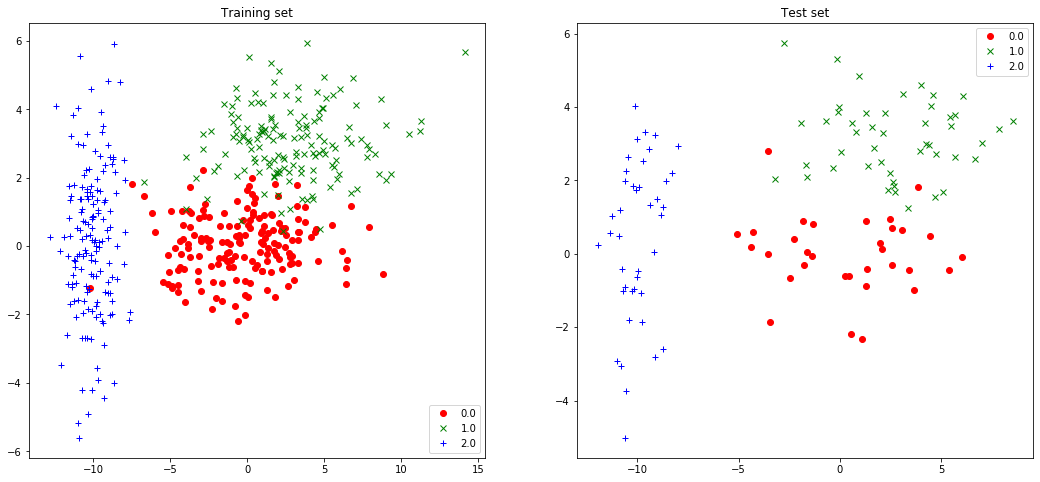

In [138]:
plt.figure(figsize=(18,8))
y = [Y_train, y_test]

titles = ["Training set", "Test set"] 
for idx, dataset in enumerate([X_train, x_test]):
    plt.subplot(1, 2, idx+1)
    scatter2d_multiclass(dataset, y[idx])
    plt.title(titles[idx])

plt.show()

In [139]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, Y_train.ravel()) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [153]:
def visualize_predictions(data, labels_gt, labels_pred, title):
    """ Visualizes the dataset, where the GT classes are denoted by "x", "o", "+" markers which are colored according to predicted labels.
    Args:
        data (np.array): Dataset, shape (N, D).
        labels_gt (np.array): GT labels, shape (N, ).
        labels_pred (np.array): Predicted labels, shape (N, )
        fig (plt.Figure): Figure to plot to. If None, new one is created.
    Returns:
        plf.Figure: Figure.
    """
    if data.shape[1] == 3:
        data = data[:, 1:]

    #if fig is None:
    #   fig, _ = plt.subplots(1, 1)
    #ax = fig.gca()

    # Prepare legend labels.
    classes = np.unique(labels_gt)
    marker_map = {0: 'x', 1: 'o', 2: '+'}
    color_map={0: 'r', 1: 'g', 2: 'b'}    
    
    #ax.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
    for pt in range(len(labels_pred)):   
        if labels_pred[pt] == labels_gt[pt]:                     #Correct prediction
            plt.scatter(data[pt, 0], data[pt, 1], marker = marker_map[int(labels_gt[pt])]
                        , color = color_map[int(labels_pred[pt])])
                      #, label="gt: " + str(labels_gt[pt]) + ", pred:" + str(labels_pred[pt]))
        else:                                                    #Wrong prediction
            plt.scatter(data[pt, 0], data[pt, 1], marker = marker_map[int(labels_gt[pt])]
                        , color = color_map[int(labels_pred[pt])])
                       #, label="gt: " + str(labels_gt[pt]) + ", pred:" + str(labels_pred[pt]))
    plt.title(title)

In [154]:
score_knn = KNN.score(x_test, y_test)
print("\tScore of KNN Model:", score_knn)

	Score of KNN Model: 0.9583333333333334


**Comment:**

- The KNN model performed slightly worse than Bayesian model, however this is not a precise comparison, as KNN was tested on a randomly selected test set while Bayesian was tested on the entire data set.

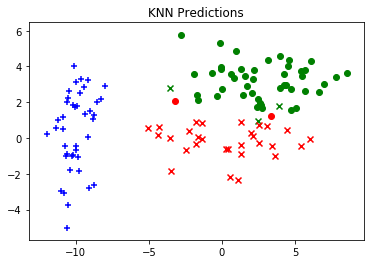

In [155]:
predictions = []
for elem in range(len(x_test)):
    predictions.append(KNN.predict([[x_test[elem, 0], x_test[elem, 1]]]))

predictions = np.asarray(predictions) 
#print(y_test.shape)
#print(x_test.shape)
#print(predictions.shape)
visualize_predictions(data=x_test, labels_gt=y_test, labels_pred=predictions, title="KNN Predictions")

In [156]:
from sklearn.metrics import classification_report
target_names = ['class a', 'class b', 'class c']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class a       0.94      0.91      0.92        32
     class b       0.94      0.96      0.95        47
     class c       1.00      1.00      1.00        41

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



**Comment:**

- The classification of class c has perfect presicision and recall, which is expected due to its relative seperation from classes a and b.

----------------------------------------------------------------------------------------------

**2\ K-Means Clustering**

**Clustering**: (or cluster analysis) is a technique that allows us to find groups of similar objects, objects that are more related to each other than to objects in other groups. Examples of business-oriented applications of clustering include the grouping of documents, music, and movies.

K-Means Clustering algorithm can be broken down into the following four steps:
- Randomly pick k centroids from the sample points as initial cluster centers.
- Assign each sample to the nearest centroid μ^(j), j ∈ {1, …, k}.
- Move the centroids to the center of the samples that were assigned to it.
- Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

In [157]:
from sklearn.cluster import KMeans

km1 = KMeans(
    n_clusters=3, init = "k-means++", n_init = 100
).fit(X_train)

In [158]:
y_km1 = km1.predict(x_test)

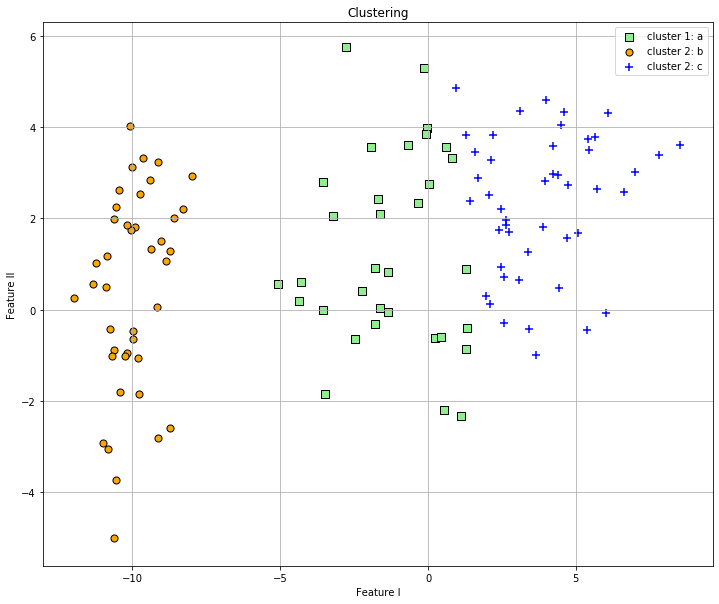

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(
    x_test[y_km1 == 0, 0], x_test[y_km1 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1: a'
)

ax.scatter(
    x_test[y_km1 == 1, 0], x_test[y_km1 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2: b'
)

ax.scatter(
    x_test[y_km1 == 2, 0], x_test[y_km1 == 2, 1],
    s=50, c='blue',
    marker='+', edgecolor='black',
    label='cluster 2: c'
)

ax.set_xlabel("Feature I")
ax.set_ylabel("Feature II")
ax.set_title("Clustering")
ax.legend(scatterpoints=1)
ax.grid()

plt.show()

**Comment:**

- K-Means Clustering cannot produce clusters that remotely resemble classes a and b, while class c is correctly clustered. As classes a and b have highly entangled and adjacent distributions, the algorithm may not be able to distinguish one from the other. 

- It is worth noting that all classifications methods that have worked for these classes were supervised/used prior knowledge in some way.
   * (Gaussian distribution estimated with mean and covariance estimated from data, labeled data points later on in the neural networks of part 2) 

- Without prior knowledge about distributions, we were not able to identify classes a and b.

In [160]:
score_kmeans = km1.score(x_test, y_test)
print("\tScore of K-Means Model:", score_kmeans)

	Score of K-Means Model: -743.953662550442


- The score of the K-Means Model reflects the graphical result, both are unsatisfactory.

----------------------------------------------------------------------------------------------

**3\ Naive Bayes**

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

Reference: https://scikit-learn.org/stable/modules/naive_bayes.html

In [85]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
#print(Y_train.shape)
y_pred = gnb.fit(X_train, Y_train.ravel()).predict(x_test)

In [86]:
score_gnb = gnb.score(x_test, y_test)
print("\tScore of Naive Bayes Model:", score_gnb)

	Score of Naive Bayes Model: 0.975


- The Naive Bayes Model performed better than the Gaussian classifier of part 1.1, as it was the case for KNN.

----------------------------------------------------------------------------------------------

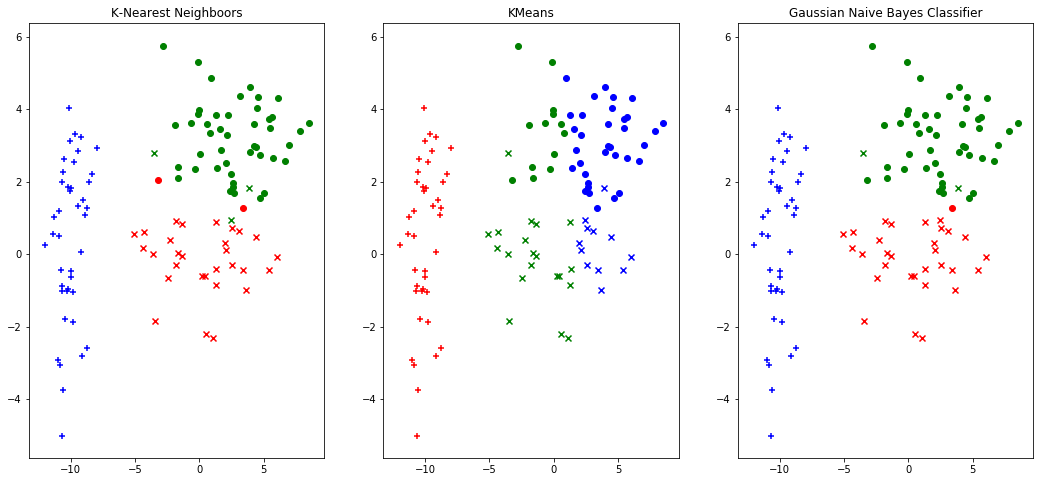

In [125]:
titles=['K-Nearest Neighboors', 'KMeans','Gaussian Naive Bayes Classifier']

#def visualize_predictions(data, labels_gt, labels_pred, fig=None):
#visualize_predictions(x_test, y_test, predictions, "KNN Predictions")
results = [predictions, y_km1, y_pred]
plt.figure(figsize=(18,8))

for idx, model in enumerate([KNN, km1, gnb]):
    plt.subplot(1, 3, idx+1)
    visualize_predictions(x_test, y_test, results[idx], titles[idx])
    plt.title(titles[idx])

plt.show()

---------------------------------------------------------------------------------------------------

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [5]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

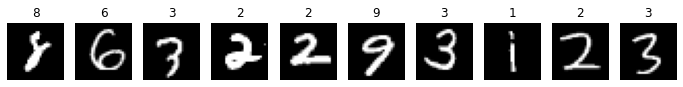

In [6]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP


First we normalize the train and test set in order to have a *0* mean and *unit* variance train set

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_images_norm = scaler.fit_transform(train_images.reshape(-1, 28*28)).reshape(-1, 28, 28)
test_images_norm = scaler.transform(test_images.reshape(-1, 28*28)).reshape(-1, 28, 28)

As instructed the architecture of the network is the following : <br>
- **Input layer** : 784 units <br>
- **Hidden layer** : 100 units<br>
- **Output layer** : 10 units<br>

Activation on the hidden layer is __*Leaky relu*__ to avoid vanishing gradient. Since we are dealing with a classification problem, we use the *negative log likelihood loss* and the *log softmax* activation for the final layer.

- There are 2 tunable parameters to this MLP : leaky relu's negative slope and SGD's learning rate. 

- The optimal parameters are found with a grid search and we average the accuracy over 5 runs<br>

In [34]:
import torch
from torch import optim, nn
from torch.nn import functional as F
import numpy as np


class MLP(nn.Module):
    
    def __init__(self, relu = 0.01):
        super(MLP, self).__init__()
        self.lin1 = nn.Linear(784, 100)
        self.lin2 = nn.Linear(100, 10)
        self.relu = relu
    
    def forward(self, x):
        x = F.leaky_relu(self.lin1(x), negative_slope = self.relu)
        x = F.log_softmax(self.lin2(x))
        return x

    
    def train_(self, n_epochs, learning_rate, batch_size):
        opt = optim.SGD(self.parameters(), lr=learning_rate)
        losses = []
        for n in range(n_epochs):
            sum_loss = 0
            for b in range(0, len(train_images_norm), batch_size):
                predictions = self(torch.Tensor(train_images_norm).view(-1, 28*28).narrow(0, b, batch_size))
                loss = F.nll_loss(predictions, torch.LongTensor(train_labels).narrow(0, b, batch_size))
                sum_loss = sum_loss + loss.item()
                self.zero_grad()
                loss.backward()
                opt.step()
            losses.append(sum_loss)
        return losses
            
    def test_(self, batch_size):
        nb_errors = 0
        for b in range(0, len(test_images_norm), batch_size):
            predictions = self(torch.Tensor(test_images_norm).view(-1, 28*28).narrow(0, b, batch_size))
            predictions_classes = torch.argmax(predictions, dim = 1)
            for k in range(batch_size):
                if torch.Tensor(test_labels)[b+k].item() != predictions_classes[k].item():
                    nb_errors += 1
        return 1 - nb_errors*1.0/len(test_images)


In [41]:
#Grid search for leaky relu's negative slope, SGD's learning rate

relu_slope = [0.01, 0.02, 0.05]
learning_rate = [0.05, 0.1, 0.2]

best_param = []
best_accuracy = -1
for relu in relu_slope:
    for lr in learning_rate:
        accuracies = []
        for iter_ in range(5):
            mlp = MLP(0.02)
            train_losses = mlp.train_(n_epochs=25, learning_rate=lr, batch_size=100)
            accuracy = mlp.test_(100)
            accuracies.append(accuracy)
        mean_ = sum(accuracies)/5.0
        if mean_>best_accuracy:
            best_accuracy = mean_
            best_param = [relu, lr]
print("Accuracy for MLP on test set with 25 epochs averaged over 5 runs : " + str(best_accuracy))

/home/arnaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy for MLP on test set with 25 epochs averaged over 5 runs : 0.97564


**Comment:**

- So far, MLP is the best performer among all classifiers, however a CNN implementation may produce even better results as we are classifying 2D images where the neighborhood of a pixel carries valuable information as opposed to a string of variables.

---------------------------------------------------------------------------------------------

### Additional method : CNN

For graphical recognition, convolutions offer a performance enhancement. We trained a convolutionnal neural network CNN with ***two convolutionnal layers*** and ***one hidden linear layer***. 

Between each convolutionnal layer, we used ***a leaky relu activation*** and ***a max-pool layer***, as well as ***a leaky relu activation*** for the hidden linear layer. Again we used the *negative log likelihood loss* and the *log softmax* activation for the final layer as it is standard for classification with C classes

In [46]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
    
    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.leaky_relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
    def train_(self, n_epochs, learning_rate, batch_size):
        self.train()
        opt = optim.SGD(self.parameters(), lr=learning_rate)
        losses = []
        for n in range(n_epochs):
            sum_loss = 0
            for b in range(0, len(train_images_norm), batch_size):
                predictions = self(torch.Tensor(train_images_norm).narrow(0, b, batch_size).view(-1, 1, 28, 28))
                loss = F.nll_loss(predictions, torch.LongTensor(train_labels).narrow(0, b, batch_size))
                sum_loss = sum_loss + loss.item()
                self.zero_grad()
                loss.backward()
                opt.step()
            losses.append(sum_loss)
        return losses
            
    def test_(self, batch_size):
        nb_errors = 0
        for b in range(0, len(test_images_norm), batch_size):
            predictions = self(torch.Tensor(test_images_norm).view(-1, 1, 28, 28).narrow(0, b, batch_size))
            predictions_classes = torch.argmax(predictions, dim = 1)
            for k in range(batch_size):
                if torch.Tensor(test_labels)[b+k].item() != predictions_classes[k].item():
                    nb_errors += 1
        return 1 - nb_errors*1.0/len(test_images)

In [47]:
accuracies = []
for iter_ in range(5):
    cnn = CNN()
    train_losses = cnn.train_(25, 0.2, 100)
    accuracy = cnn.test_(100)
    accuracies.append(accuracy)
mean_accuracy = sum(accuracies)/5.0
print("Accuracy for CNN on test set with 25 epochs averaged over 5 runs : " + str(mean_accuracy))

Accuracy for MLP on test set with 25 epochs averaged over 5 runs : 0.9926


**Comment:**
- CNN overwhelmingly outperforms all other methods of classification.